# Data Description <br>
Dataset Tesla stock merupakan menyediakan informasi mengenai harga saham Tesla setiap harinya dalam rentang tahun 2010-2020. <br><br> Dataset ini terdiri dari 2416 baris dengan 7 kolom : <br> 1. Date  : time-series yang mewakili tanggal hari transaksi yang relevan<br>2.  Open : data dalam bentuk numerik merepresentasikan harga pembukaan saham pada saat transaksi <br> 3. High yang merepresentasikan data yang diberikan dalam bentuk numerik tentang harga tertinggi pada saham yang pernah terjadi pada satu periode perdagangan. <br> 4. Low : data numerik yang menunjukkan harga terendah pada saham yang pernah terjadi pada satu periode perdagangan. <br> 5. Close : data numerik yang  merupakan variabel yang menunjukkan harga penutupan saham dalam satu hari perdagangan. <br>6. adj close yang mewakili harga penutupan yang disesuaikan dari saham pada hari perdagangan yang mempengaruhi pembayaran<br>7. Volume : jumlah saham yang diperdagangkan selama satu hari dan Volume perdagangan saham yang direpresentasikan dalam bentuk numerik mengukur seberapa aktifnya perdagangan saham pada suatu hari tertentu dan sering dianggap sebagai salah satu indikator kekuatan atau kelemahan tren harga saham. <br><br> Dataset ini tidak memiliki missing value yang artinya tidak terdapat cell yang tidak terisi (kosong). 


# Data Collection and EDA

In [1]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Path to the CSV file
df = pd.read_csv("https://raw.githubusercontent.com/cutnurhidayanti/INF-540-Kelompok1/main/Database/Project1-TSLA.csv")

In [3]:
print(f"the rows and columns in the dataset:{df.shape}")
print(f"the column headers in the dataset: {df.columns}")

the rows and columns in the dataset:(2416, 7)
the column headers in the dataset: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [19]:
# Printing first 5 rows of the dataset
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [20]:
 df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [21]:
# Printing statistical information of the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [22]:
# Checking for empty data fields in the dataset
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [23]:
# Checking data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


Text(0.5, 1.0, 'The General Trend of all values')

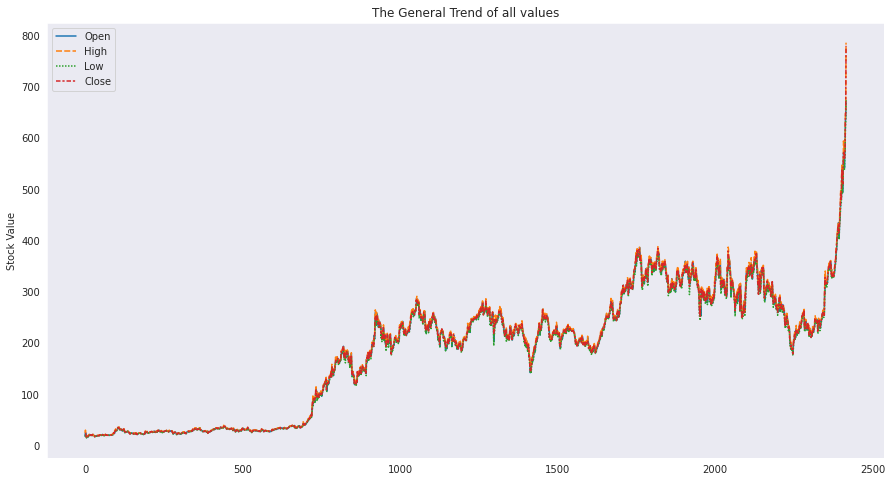

In [24]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df.iloc[:,:-2])
plt.ylabel("Stock Value")
plt.title("The General Trend of all values")

# Modelling

## Fiture, Training and testing

In [4]:

# Dropping date column from our dataset
df = df.drop(['Date'],axis=1)

In [5]:
# Seperating Target variables and features
# Target Variable
y = df["Close"]

# Features
x = df.drop(["Close","Adj Close"],axis=1)

In [6]:
# Spliting the data in 80%, 20% for training and testing
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2)

## Multiple Linear Regression

In [7]:
# Making the model using LinearRegression()
model = LinearRegression()

# Fiting the training data in the model
model.fit(xTrain,yTrain)

LinearRegression()

In [8]:
model.score(xTrain,yTrain)

0.9997191341924782

In [9]:
# Getting the intercept and Coefficients
print("Intercept: ",model.intercept_)
print("Coefficients: ")
for _ in model.coef_:
    print(_)

Intercept:  -0.04071157992677854
Coefficients: 
-0.6696374404249015
0.9146887429204185
0.7541807450746671
-2.590376413369455e-08


In [18]:
# Making predictions using the predict() and xTest data
predictions = model.predict(xTest)

In [32]:
model.score(xTest,yTest)

0.9996334315872235

In [33]:
comparison = pd.DataFrame({'Predicted Values':predictions,'Actual Values':yTest})

In [34]:
print(comparison.head(15))

      Predicted Values  Actual Values
2322        246.423870     246.600006
1468        250.915248     247.710007
2121        341.455681     341.170013
312          25.382539      25.629999
980         198.108192     199.449997
1592        202.747139     202.759995
1087        234.661873     231.100006
948         216.840512     212.229996
1701        277.323539     278.299988
1723        315.349527     311.019989
2078        269.317553     264.769989
1322        250.271357     246.649994
454          32.579845      32.240002
1566        203.820449     205.399994
640          33.035077      33.259998


In [20]:
predictions = model.predict(xTrain)

In [21]:
mse = mean_squared_error(yTrain, predictions)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

3.9830543540529644
1.9957590921884747


In [22]:
# Closing price vs the Volume
sns.set_style("dark")
sns.regplot(x['Volume'],y)

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


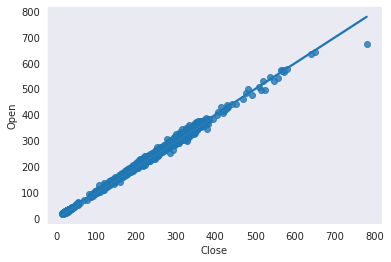

In [36]:
# Closing price vs Opening price
sns.regplot(y,x["Open"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


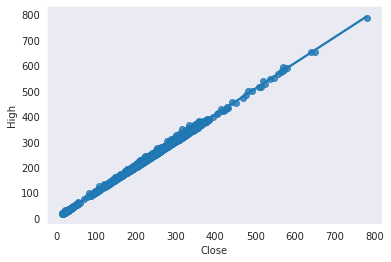

In [37]:
# Closing price vs High price
sns.regplot(y,x["High"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


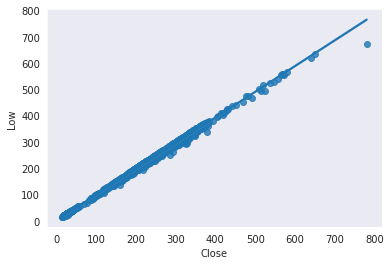

In [38]:
# Closing price vs Low price
sns.regplot(y,x["Low"])

## Binary Linear Regression

Coefficients: 
 [1.00228441]
Intercept: 
 -0.30203471946990135


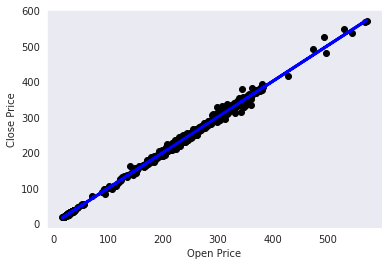

In [39]:


# Load the data
# df = pd.read_csv("TSLA.csv")

# Split data into training and testing sets
X = df[['Open']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a linear regression object
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# Print the coefficients and intercept of the linear regression
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()


Kode di atas memuat dataset harga saham Tesla, memisahkan fitur 'Open' sebagai variabel independen (X) dan 'Close' sebagai variabel dependen (y), dan kemudian membagi data menjadi set pelatihan dan pengujian. Kemudian, model LinearRegression diinisialisasi, dilatih pada set pelatihan, dan diuji pada set pengujian untuk memprediksi nilai 'Close' dari nilai 'Open'. Akhirnya, koefisien dan intercept model ditampilkan, dan plot regresi ditampilkan untuk memvisualisasikan hubungan antara fitur 'Open' dan target 'Close'.


In [16]:
predictions = model.predict(xTrain)

In [14]:
mse = mean_squared_error(yTrain, predictions)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

3.9830543540529644
1.9957590921884747
